Grupo: Gabriela Cristina Moreira dos Santos,
       Lucas Guilherme Silva de Carvalho

---

## **Reconhecimento facial em risco: Vulnerabilidades e defesas contra ataques adversariais.**

A elaboração da componente de Discriminador de Imagem constitui um dos principais focos deste projeto. Este módulo visa inicialmente a incorporar procedimentos de detecção de rostos, extração de características e classificação. O objetivo é dotar o sistema da habilidade de identificar indivíduos a partir de imagens, associando, de forma eficiente, as faces detectadas aos seus respectivos rótulos correspondentes.

### **Importar a base de dados LFW**

In [1]:
# Importa a função 'drive' da biblioteca 'google.colab'
from google.colab import drive

# Monta o Google Drive no diretório '/content/drive'
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Alterar o diretório de trabalho atua
%cd /content/drive/MyDrive/IA/Projeto_Final/archive/lfw-deepfunneled

/content/drive/MyDrive/IA/Projeto_Final/archive/lfw-deepfunneled


In [3]:
# Path está recebendo uma string que representa o caminho completo para o diretório "lfw-deepfunneled" no Google Drive
path='/content/drive/MyDrive/IA/Projeto_Final/archive/lfw-deepfunneled'

### **Bibliotecas e Instalações**

#### **Instalações**

In [25]:
! pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2)
ERROR: No matching distribution found for tensorflow==2.4.1


In [6]:
! pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Coleta de caminhos de imagens e nomes de pessoas em um diretório de imagens
image_path_names = []
person_names = set()

for root, dirs, files in os.walk(path + '/Images'):
    for dir_name in dirs:
        if '_' in dir_name:
            person_names.add(dir_name)
            dir_path = os.path.join(root, dir_name)
            for file_name in os.listdir(dir_path):
                if file_name.startswith(dir_name) and file_name.endswith('.jpg'):
                    image_path = os.path.join(dir_path, file_name)
                    image_path_names.append(image_path)

print("Image paths:")
for image_path in image_path_names:
    print(image_path)

print("\nPerson names:")
for person_name in person_names:
    print(person_name)


A saída de streaming foi truncada nas últimas 5000 linhas.
Mikulas_Dzurinda
Manuel_Pellegrini
Nona_Gaye
Chris_Reitsma
Leon_Barmore
Yuri_Malenchenko
Cynthia_Rowley
Kellie_Greene
Oxana_Fedorova
Paul_Wollnough
Peter_Mugyeni
Mo_Elleithee
Luiz_Inacio_Lula_da_Silva
Randall_Tobias
Richard_Daley
Jesse_James
Brandon_Robinson
Gary_Williams
Alison_Lohman
George_Clooney
Aileen_Riggin_Soule
James_Coburn
Ivan_Stambolic
Federico_Castelan_Sayre
Mariana_Gonzalez
Rebecca_Romijn-Stamos
Bonnie_Fuller
Scott_Rolen
David_Shayler
Richard_Shelby
John_Eder
Paek_Nam_Sun
El_Hadji_Diouf
Julia_Ormond
David_Bell
Danielle_Spencer
Andy_North
Hugh_Jessiman
Justin_Timberlake
Gerry_Kelly
Edward_Egan
Gerhard_Schmid
Bianca_Jagger
Jelena_Dokic
Syed_Abdul_Rahman_Geelani
Aishwarya_Rai
Dean_Sheremet
Gavyn_Davies
Dimitri_Perricos
Arnoldo_Aleman
Jason_Bentley
Bruce_Weber
Dan_Duquette
Brooke_Adams
Rob_Niedermayer
Mark_Mulder
Ryan_Drese
Christian_Bale
Oliver_Stone
Markus_Beyer
Tanya_Holyk
David_Braley
Rod_Jong-il
Michael_Sullivan


In [10]:
# Retorna o número de elementos (caminhos de imagens) presentes nessa lista
len(image_path_names)

13193

In [11]:
person_names

{'Bobby_Jackson',
 'Michael_Kors',
 'James_Robertson_Jr',
 'Mario_Alfaro-Lopez',
 'Melissa_Mulloy',
 'Martha_Martinez_Flores',
 'Troy_Aikman',
 'Debra_Brown',
 'Kristin_Scott',
 'Maryn_McKenna',
 'Brad_Brownell',
 'John_Lithgow',
 'Mike_Bryan',
 'Rosny_Desroches',
 'Kara_Lynn_Joyce',
 'Kent_Rominger',
 'Federico_Fellini',
 'Ramiro_Goben_Reducindo',
 'Jeff_George',
 'Charles_Chandler_IV',
 'Dean_Jacek',
 'Rohinton_Mistry',
 'Pieter_Bouw',
 'Kellie_Coffey',
 'Hikmat_al-Azzawi',
 'John_Ashcroft',
 'John_Rosa',
 'Mark_Schweiker',
 'Reina_Hayes',
 'Richard_Regenhard',
 'Hank_Stram',
 'Caio_Blat',
 'Wayne_Allard',
 'Calista_Flockhart',
 'John_Reid',
 'Mark_Martin',
 'Anne_Donovan',
 'Kenny_Brack',
 'Felipe_Perez_Roque',
 'Jia_Qinglin',
 'Adam_Herbert',
 'Ornella_Muti',
 'Hermann_Maier',
 'Ralph_Lauren',
 'Art_Howe',
 'Alain_Ducasse',
 'Bonnie_Hunt',
 'Vitali_Klitschko',
 'Olivera_Labus',
 'Kirsten_Dunst',
 'Barbra_Streisand',
 'Michael_Shelby',
 'Princess_Anne',
 'Jeffrey_Scott_Postell',
 'W

#### **Importando bibliotecas**

In [4]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import dlib
import tensorflow as tf
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input

### **Utilizando a Dlib**

####**Explicação**

A Dlib é uma biblioteca de visão computacional que fornece uma variedade de algoritmos e ferramentas para processamento de imagens, detecção de objetos, reconhecimento de padrões e muito mais. Embora o Dlib inclua um modelo de detecção de rosto pré-treinado, sua funcionalidade vai além disso, abrangendo uma ampla gama de algoritmos e técnicas em visão computacional.

#### **Código**

In [12]:
# Download do modelo treinado para detecção de rostos utilizando a biblioteca Dlib (Dlib CNN face detector)
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2023-06-25 15:28:37--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K   557KB/s    in 1.2s    

2023-06-25 15:28:38 (557 KB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [13]:
# Descompactar o arquivo mmod_human_face_detector.dat.bz2
!bzip2 -dk mmod_human_face_detector.dat.bz2

bzip2: Output file mmod_human_face_detector.dat already exists.


In [14]:
# Excluir o arquivo mmod_human_face_detector.dat.bz2 do diretório atual
%rm mmod_human_face_detector.dat.bz2

In [15]:
# Criar um objeto dnnFaceDetector que representa um modelo de detecção de rostos baseado em redes neurais convolucionais (CNN) da biblioteca Dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [15]:
# Criar um novo diretório chamado "Images_crop" dentro do diretório especificado por path
# Diretório já criado, precisa rodar só a primeira vez
#os.mkdir(path+'/Images_crop/')

In [16]:
# Criar um pasta para cada pessoa
# Pastas já criadas, precisa rodar só a primeira vez
# for person in person_names:
#   os.mkdir(path+'/Images_crop/'+person+'/')

In [16]:
# Ordena os nomes das pastas em ordem alfabética
person_names_sorted = sorted(person_names)

# Limita a iteração a 10 pessoas
limited_person_names_sorted = person_names_sorted[:10] # A primeira vez foram todas as imagens, aqui é só uma amostra para mostrar o funcionamento do código

# Detecta o rosto, recorta o rosto detectado e salva nas pastas correspondentes de cada pessoa
for person_name in limited_person_names_sorted:
    person_folder_path = os.path.join(path, 'Images_crop', person_name)
    os.makedirs(person_folder_path, exist_ok=True)

    # Filtra as imagens correspondentes a cada pessoa
    filtered_image_path_names = [file_name for file_name in image_path_names if person_name in file_name]

    # Ordena as imagens por nome de arquivo em ordem alfabética
    filtered_image_path_names_sorted = sorted(filtered_image_path_names)

    for index, file_name in enumerate(filtered_image_path_names_sorted):
        img = cv2.imread(file_name)

        # Verifica se a imagem foi carregada corretamente
        if img is None:
            print(f"Erro ao carregar a imagem: {file_name}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        rects = dnnFaceDetector(gray, 1)
        left, top, right, bottom = 0, 0, 0, 0
        for (i, rect) in enumerate(rects):
            left = rect.rect.left()  # x1
            top = rect.rect.top()  # y1
            right = rect.rect.right()  # x2
            bottom = rect.rect.bottom()  # y2
        width = right - left
        height = bottom - top
        img_crop = img[top:top + height, left:left + width]

        # Verifica se o recorte do rosto está vazio
        if img_crop.size == 0:
            print(f"Recorte do rosto vazio para a imagem: {file_name}")
            continue

        file_number = str(index + 1).zfill(4)
        img_filename = f"{person_name}_{file_number}.jpg"
        img_path = os.path.join(person_folder_path, img_filename)
        #print(img_path)
        cv2.imwrite(img_path, img_crop)


In [17]:
# Encontrar caminhos de todas as imagens de teste encontradas que correspondem ao padrão especificado
test_image_path_names=[]
for file_name in glob.glob(path+'/Images_test/*_[123].jpg'):
  test_image_path_names.append(file_name)

In [18]:
len(test_image_path_names)

1

In [21]:
# Criar um novo diretório chamado "Test_Images_crop" dentro do diretório especificado por path
# Diretório já criado, precisa rodar só a primeira vez
#os.mkdir(path+'/Test_Images_crop/')

In [23]:
# Criar uma pasta separada para cada pessoa no diretório "Test_Images_crop"
# Pastas já criadas, precisa rodar só a primeira vez
#for person in person_names:
#   os.mkdir(path+'/Test_Images_crop/'+person+'/')

In [20]:
# Detectar rosto, recortar rosto e salvar na pasta correspondente
for file_name in test_image_path_names:
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Test_Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

### **Utilizando a VGG-Face**

####**Explicação**

A VGG-Face é um modelo de rede neural convolucional (CNN) pré-treinado que foi treinado em um grande conjunto de dados para a tarefa de reconhecimento facial. Ele foi projetado especificamente para extrair representações robustas e discriminativas de características faciais, permitindo o reconhecimento de rostos em imagens.

**Diferença entre Dlib e VGGG-Face:**
A VGG-Face é um modelo específico para reconhecimento facial, enquanto o Dlib é uma biblioteca abrangente com uma variedade de recursos em visão computacional, incluindo detecção de rosto, alinhamento facial, extração de características, entre outros. Cada um tem sua utilidade em diferentes contextos e aplicações.

####**Código**

In [23]:
# Baixar um arquivo .h5 que contém os pesos pré-treinados do modelo VGG-Face.
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo 



In [24]:
# Exibir uma lista dos arquivos e diretórios presentes no diretório atual
%ls

Images/       mmod_human_face_detector.dat  Test_Images/       train_data.npy
Images_crop/  Predictions/                  Test_Images_crop/  train_labels.npy
Images_test/  test_data.npy                 test_labels.npy    vgg_face/


In [25]:
# Definir a arquitetura do modelo VGG_FACE_MODEL usando a classe Sequential do TensorFlow/Keras (extrair características discriminativas de imagens de rostos)
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [26]:
# Carrega os pesos do modelo VGG Face a partir do arquivo "vgg_face_weights.h5"
model.load_weights('/content/drive/MyDrive/IA/Projeto_Final/archive/lfw-deepfunneled/vgg_face/vgg_face_weights.h5')

In [27]:
# Tabela de resumo do modelo model, que fornecerá uma visão geral das camadas e do número de parâmetros do seu modelo VGG Face
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [28]:
# Remover a última camada softmax e obter o modelo até a última camada de achatamento com 2622 unidades
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

### **Treino e Teste dos Dados**

#### **Dados de Treinamento**

##### **Explicação**

Os dados de treinamento estão sendo preparados para o treinamento de um modelo. A ideia é obter as representações de características faciais (vetores de características) das imagens das pessoas e seus respectivos rótulos.

* x_train é uma lista que armazenará as representações de características faciais (vetores de características) das imagens.
* y_train é uma lista que armazenará os rótulos correspondentes a cada imagem, representando a pessoa a que ela pertence.
* person_folders contém a lista de pastas das pessoas, obtidas a partir do diretório de imagens.
* person_rep é um dicionário que mapeia o índice da pessoa ao seu nome.
* Para cada imagem, ela é carregada, redimensionada para o tamanho desejado (224x224), convertida em um array, expandida em uma dimensão adicional e pré-processada para ser adequada ao modelo VGG Face.
* Em seguida, a imagem é codificada utilizando o modelo VGG Face, gerando a representação de características (vetor de características) da imagem.
* Essa representação é adicionada à lista x_train após converter o tensor para um array e achatar.
* O rótulo da pessoa correspondente (índice) é adicionado à lista y_train.
* Esse processo é repetido para todas as imagens de todas as pessoas, resultando em duas listas contendo as representações de características e os rótulos correspondentes de todas as imagens de treinamento.

Esses dados de treinamento podem ser usados para treinar um modelo de reconhecimento facial ou para qualquer outra tarefa relacionada que envolva o aprendizado com essas representações de características faciais.

##### **Código**

In [29]:
# Preparar os dados de treinamento
x_train = []
y_train = []
person_folders = os.listdir(path+'/Images_crop/')
person_rep = dict()

# Iterar sobre as pastas das pessoas
for i, person in enumerate(person_folders):
    person_rep[i] = person
    image_names = os.listdir('Images_crop/'+person+'/')

    # Iterar sobre as imagens de cada pessoa
    for image_name in image_names:
        # Carregar a imagem e redimensionar para o tamanho desejado (224x224)
        img = load_img(path+'/Images_crop/'+person+'/'+image_name, target_size=(224,224))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)

        # Codificar a imagem utilizando o modelo VGG Face
        img_encode = vgg_face(img)

        # Adicionar a representação da imagem (vetor de características) aos dados de treinamento
        x_train.append(np.squeeze(K.eval(img_encode)).tolist())

        # Adicionar o rótulo da pessoa correspondente aos dados de treinamento
        y_train.append(i)


In [30]:
person_rep

{0: 'Sim_Yong',
 1: 'Ricky_Barnes',
 2: 'Aby_Har-Even',
 3: 'Randy_Ferbey',
 4: 'Sarah_Wynter',
 5: 'Jiang_Zemin',
 6: 'Cecile_de_France',
 7: 'Mike_Weir',
 8: 'Julius_Erving',
 9: 'Kjell_Magne_Bondevik',
 10: 'Jennifer_Tilly',
 11: 'Denis_Coderre',
 12: 'Christopher_Whittle',
 13: 'Mel_Brooks',
 14: 'Craig_OClair',
 15: 'Kelly_Santos',
 16: 'Boutros_Boutros_Ghali',
 17: 'Michael_Kostelnik',
 18: 'Paul_Byrd',
 19: 'Gary_Condit',
 20: 'Desiree_Lemosi',
 21: 'Marat_Safin',
 22: 'Gennifer_Flowers',
 23: 'Keith_Lowen',
 24: 'Derrick_Rodgers',
 25: 'Jacqueline_Marris',
 26: 'Mikulas_Dzurinda',
 27: 'William_McDonough',
 28: 'Harvey_Wachsman',
 29: 'Jane_Menelaus',
 30: 'Casey_Crowder',
 31: 'Roger_Federer',
 32: 'Keith_Tyson',
 33: 'Susan_Walvius',
 34: 'Rafidah_Aziz',
 35: 'Chris_Kolanas',
 36: 'Paul_William_Hurley',
 37: 'Catherine_Woodard',
 38: 'Alecos_Markides',
 39: 'Chris_Cookson',
 40: 'Nicolas_Macrozonaris',
 41: 'Darrell_Royal',
 42: 'Yang_Hee_Kim',
 43: 'Paul_Lockhart',
 44: 'Adr

In [31]:
x_train=np.array(x_train)
y_train=np.array(y_train)

#### **Dados de Teste**

In [32]:
# Preparar os dados de teste
x_test = []
y_test = []
person_folders = os.listdir(path+'/Test_Images_crop/')

# Iterar sobre as pastas das pessoas
for i, person in enumerate(person_folders):
    image_names = os.listdir('Test_Images_crop/'+person+'/')

    # Iterar sobre as imagens de cada pessoa
    for image_name in image_names:
        # Carregar a imagem e redimensionar para o tamanho desejado (224x224)
        img = load_img(path+'/Test_Images_crop/'+person+'/'+image_name, target_size=(224,224))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)

        # Codificar a imagem utilizando o modelo VGG Face
        img_encode = vgg_face(img)

        # Adicionar a representação da imagem (vetor de características) aos dados de teste
        x_test.append(np.squeeze(K.eval(img_encode)).tolist())

        # Adicionar o rótulo da pessoa correspondente aos dados de teste
        y_test.append(i)


In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

#### **Restante do treinamento e teste**

In [ ]:
# Salvar os dados de treinamento e teste para uso posterior
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [ ]:
# Carregar os dados salvos
x_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')
x_test = np.load('test_data.npy')
y_test = np.load('test_labels.npy')

In [36]:
# Regressor softmax criado para classificar imagens com base nas codificações de características faciais
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [37]:
# Treinar o modelo de regressor softmax utilizando os dados de treinamento e validação
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
324/324 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/100
324/324 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
324/324 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
324/324 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
324/324 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
324/324 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
324/324 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
324/324 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
324/324 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
324/324 [==============================] - 1s 4ms/step - loss: nan - 

In [ ]:
# Salvar o modelo treinado em um arquivo HDF5 para uso posterior
tf.keras.models.save_model(classifier_model,'/content/drive/My Drive/Colab Notebooks/Face_Recognition/face_classifier_model.h5')

### **Testando o Reconhecimento Facial**

####**Explicação**

Nessa parte é realizado o processo de teste e previsão das imagens de teste. Para cada imagem na pasta "Test_Images", exceto a imagem "crop_img.jpg":

* A imagem é carregada e convertida para escala de cinza.
* As faces são detectadas na imagem utilizando o modelo de detecção de faces.
  Para cada face detectada:
* A face é recortada da imagem original.
* A face recortada é pré-processada e codificada utilizando o modelo VGG Face.
* A representação de características (embedding) da face é obtida.
* A previsão é feita utilizando o modelo de classificação, obtendo um vetor de probabilidade para cada classe (pessoa).
* O nome da pessoa com maior probabilidade é determinado.
* A imagem é atualizada com a caixa delimitadora, o nome da pessoa e a precisão da previsão.
* A imagem com as previsões é salva na pasta "Predictions".
* A imagem é exibida utilizando a função plot() para visualização.

Esse processo é repetido para todas as imagens de teste, gerando as previsões e visualizando as imagens com as respectivas informações.

#### **Códigos**

In [ ]:
# Carregar modelo salvo
classifier_model=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Face_Recognition/face_classifier_model.h5')

In [ ]:
# Caminho para a pasta que contém as imagens a serem testadas e classificadas
test_images_path=path+'/Test_Images/'

In [ ]:
# Carregar modelo de detecção de faces baseado em redes neurais convolucionais (CNN) usando o arquivo "mmod_human_face_detector.dat"
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [ ]:
# Receber uma imagem como entrada e plotar a imagem usando a biblioteca Matplotlib
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [43]:
#Criar novo diretório
# Diretório já criado, precisa rodar só a primeira vez
#os.mkdir(path+'/Predictions')

1/1 [==============================] - 0s 103ms/step


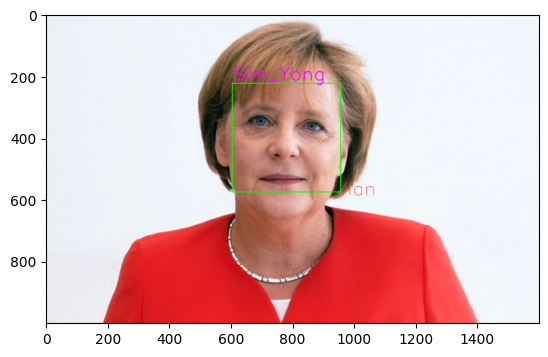

In [44]:
# Valor desejado para aumentar a fonte
font_scale = 2

for img_name in os.listdir('Test_Images/'):
    if img_name == 'crop_img.jpg':
        continue

    # Carregar a imagem
    img = cv2.imread(path + '/Test_Images/' + img_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detectar os rostos
    rects = dnnFaceDetector(gray, 1)
    left, top, right, bottom = 0, 0, 0, 0

    for (i, rect) in enumerate(rects):
        # Extrair cada rosto
        left = rect.rect.left()  # x1
        top = rect.rect.top()  # y1
        right = rect.rect.right()  # x2
        bottom = rect.rect.bottom()  # y2
        width = right - left
        height = bottom - top
        img_crop = img[top:top + height, left:left + width]
        cv2.imwrite(path + '/Test_Images/crop_img.jpg', img_crop)

        # Obter os embeddings
        crop_img = load_img(path + '/Test_Images/crop_img.jpg', target_size=(224, 224))
        crop_img = img_to_array(crop_img)
        crop_img = np.expand_dims(crop_img, axis=0)
        crop_img = preprocess_input(crop_img)
        img_encode = vgg_face(crop_img)

        # Fazer as previsões
        embed = K.eval(img_encode)
        person = classifier_model.predict(embed)
        name = person_rep[np.argmax(person)]
        os.remove(path + '/Test_Images/crop_img.jpg')
        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
        img = cv2.putText(img, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 255), 2, cv2.LINE_AA)
        img = cv2.putText(img, str(np.max(person)), (right, bottom + 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), 1, cv2.LINE_AA)

    # Salvar as imagens com retângulos, nome e precisão
    cv2.imwrite(path + '/Predictions/' + img_name, img)
    plot(img)
